In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
df =  pd.read_csv(r"C:\Users\HP\Desktop\data\titani1.csv",usecols=['Age','Fare','Survived'])

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [10]:
df.dropna(inplace=True)

In [12]:
df.shape

(714, 3)

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [17]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [20]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [21]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [23]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [28]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [25]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [29]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [30]:
output['age_label'] = pd.cut(x = x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = x_train['Fare'],bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [31]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_label,fare_labels
634,9.0,0.0,27.900,6.0,"(1.0, 11.0]","(22.62, 28.39]"
173,21.0,2.0,7.925,2.0,"(20.6, 24.0]","(7.743, 7.925]"
215,31.0,5.0,113.275,9.0,"(30.1, 34.4]","(57.783, 512.329]"
191,19.0,2.0,13.000,4.0,"(17.0, 20.6]","(10.5, 14.454]"
807,18.0,1.0,7.775,1.0,"(17.0, 20.6]","(7.743, 7.925]"


In [33]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [34]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [46]:
# funtion 
def discretize(bins,startegy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=startegy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=startegy)
    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()
    
    print("fare")
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')
    plt.show()

0.6289319248826291


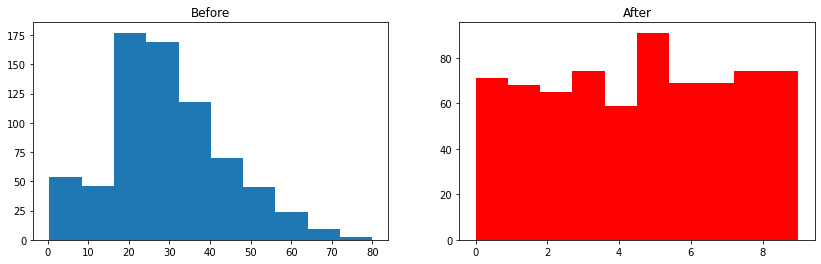

fare


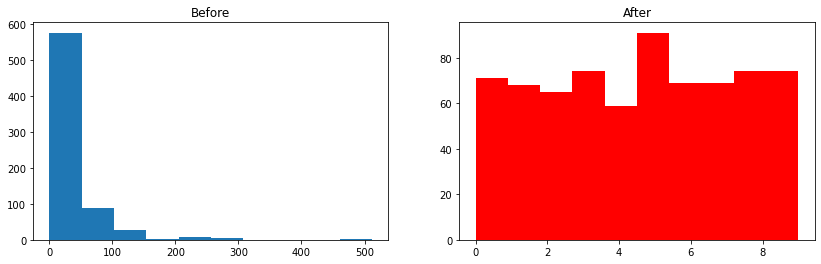

In [47]:
discretize(10,'quantile')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6330790297339592


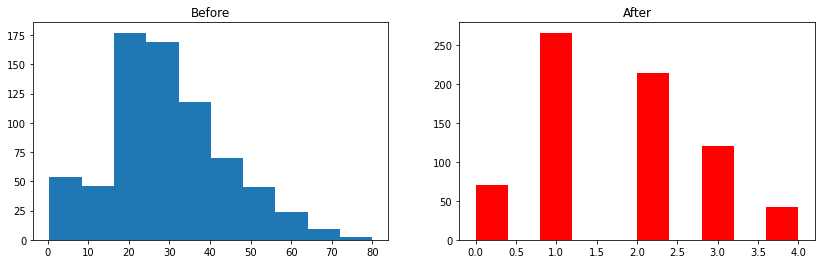

fare


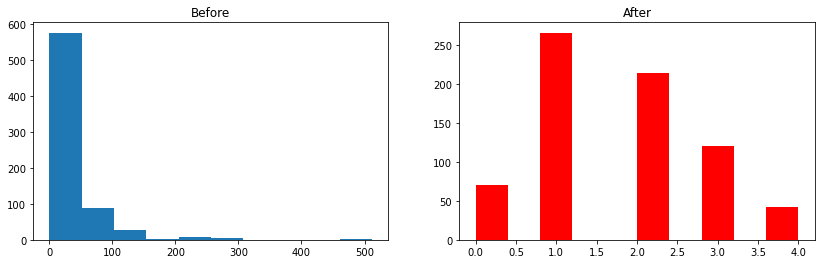

In [50]:
discretize(5,'kmeans')

0.6303403755868543


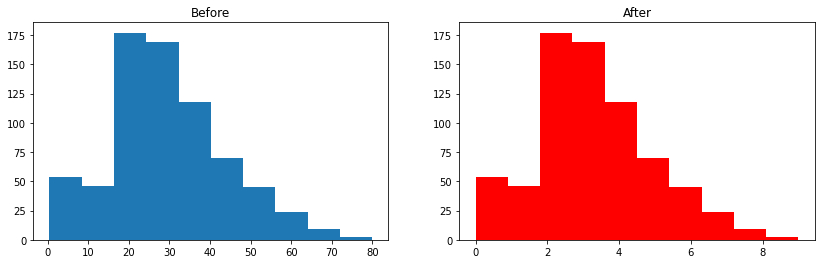

fare


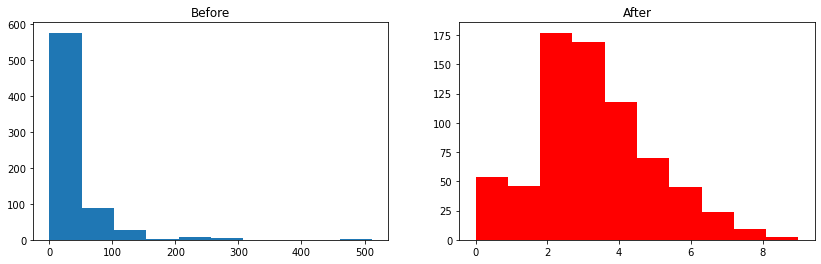

In [52]:
discretize(10,'uniform')